In [16]:
import sys
import os
import re

from pathlib import Path

In [17]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-1 path
ass_path=sys.path[-2]

print(ass_path)

f:\Vital Stuff\Εργασίες Σχολείου\The dreadful present\Μαστερ\Μαστερ Εξάμηνο 2ο\Machine Learning in Computational Biology\Project\FinalProject\MLKinCompBioFinalProject


In [28]:
%load_ext autoreload
%autoreload 2

from sex import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
X_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_SEX_subset_3k_cells.h5ad",
    verbose=False
)

my_file = Path("../data/merged_train_SEX_HY_subset3k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/merged_train_SEX_HY_subset3k.csv", index=False)

del X_df
gc.collect()

X_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2_SEX_subset_10k_cells.h5ad",
    verbose=False
)

my_file = Path("../data/merged_train_SEX_HY_subset10k.csv")

if not my_file.is_file():
    X_df.to_csv("../data/merged_train_SEX_HY_subset10k.csv", index=False)


test_df = sex_specific_region(
    region_path="../data/abc_atlas/expression_matrices/WMB-10Xv2/20230630/WMB-10Xv2-HY-log2_SEX_subset_3k_cells.h5ad",
    verbose=False,
    test=True
)

my_file = Path("../data/merged_test_SEX_HY_subset3k_v2.csv")

if not my_file.is_file():
    test_df.to_csv("../data/merged_test_SEX_HY_subset3k_v2.csv", index=False)

Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000042501', 'ENSMUSG00000099498',
       'ENSMUSG00000025927', 'ENSMUSG00000028033', 'ENSMUSG00000026141',
       'ENSMUSG00000100910',
       ...
       'ENSMUSG00000031273', 'ENSMUSG00000031274', 'ENSMUSG00000095082',
       'ENSMUSG00000015405', 'ENSMUSG00000031377', 'ENSMUSG00000086008',
       'ENSMUSG00000044583', 'ENSMUSG00000072844', 'ENSMUSG00000069053',
       'ENSMUSG00000101471'],
      dtype='object', name='gene_identifier', length=2000)
Index(['ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000067879',
       'ENSMUSG00000097893', 'ENSMUSG00000042501', 'ENSMUSG00000048960',
       'ENSMUSG00000099498', 'ENSMUSG00000025776', 'ENSMUSG00000025927',
       'ENSMUSG00000028033',
       ...
       'ENSMUSG00000086008', 'ENSMUSG00000040522', 'ENSMUSG00000044583',
       'ENSMUSG00000031355', 'ENSMUSG00000072844', 'ENSMUSG00000069053',
       'ENSMUSG00000101243',

In [20]:
common_columns = X_df.columns.intersection(test_df.columns)

X_df=X_df[common_columns].copy()
print(X_df.shape)
test_df=test_df[common_columns].copy()
print(test_df.shape)

(10000, 664)
(3000, 664)


In [ ]:
my_file = Path("../data/rncv_SEX_summary_results_HY.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/merged_train_SEX_HY_subset3k.csv',res_dest="../data/rncv_SEX_summary_results_HY.csv")

[I 2025-06-25 12:59:31,136] A new study created in memory with name: LogisticRegression


------ Repetition 1/2 ------



[I 2025-06-25 12:59:34,253] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0035431934931168755, 'l1_ratio': 0.9935015994797071}. Best is trial 0 with value: 0.5.
[I 2025-06-25 12:59:41,038] Trial 1 finished with value: 0.5839539462420819 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.2460901715233669, 'l1_ratio': 0.8598392457284284}. Best is trial 1 with value: 0.5839539462420819.
[I 2025-06-25 12:59:50,682] Trial 2 finished with value: 0.5635022541802203 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.02523457283227405, 'l1_ratio': 0.10719704664194885}. Best is trial 1 with value: 0.5839539462420819.
[I 2025-06-25 12:59:57,438] Trial 3 finished with value: 0.5840538149860184 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.18942441246034444, 'l1_ratio': 0.4592905963017455}. Best is trial 3 with value: 0.5840538149860184.
[I 2025-06-25 13:00:04,177] Trial 4 finished with value: 0.5865790675112709 and paramete

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 12 with value: 0.5963804713804713 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0010406735253226595, 'l1_ratio': 0.023451602622362525}



[I 2025-06-25 13:01:21,588] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:01:28,295] Trial 0 finished with value: 0.5471977991143162 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0028691159734684536, 'l1_ratio': 0.16470681871909043}. Best is trial 0 with value: 0.5471977991143162.
[I 2025-06-25 13:01:36,413] Trial 1 finished with value: 0.5027535239399646 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.004500114115480389, 'l1_ratio': 0.047648228556606664}. Best is trial 0 with value: 0.5471977991143162.
[I 2025-06-25 13:01:37,130] Trial 2 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0011041172742760424, 'l1_ratio': 0.0006354326416196932}. Best is trial 0 with value: 0.5471977991143162.
[I 2025-06-25 13:01:37,732] Trial 3 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.0010287900479304239, 'l1_ratio': 0.5748534461653323}. Best is trial 0 with value: 0.5471977

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.5564934845299451 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.05429468766807687, 'l1_ratio': 0.9146768086842034}



[I 2025-06-25 13:02:30,370] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:02:43,418] Trial 0 finished with value: 0.553829123741173 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0317092227140741, 'l1_ratio': 0.035972309065875896}. Best is trial 0 with value: 0.553829123741173.
[I 2025-06-25 13:02:50,087] Trial 1 finished with value: 0.554885651678331 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.020692306726571037, 'l1_ratio': 0.5036747457581496}. Best is trial 1 with value: 0.554885651678331.
[I 2025-06-25 13:03:00,357] Trial 2 finished with value: 0.5641648688659816 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.06984662712564743, 'l1_ratio': 0.6563062132935622}. Best is trial 2 with value: 0.5641648688659816.
[I 2025-06-25 13:03:07,114] Trial 3 finished with value: 0.5569179074252023 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.7738498065485886, 'l1_ratio': 0.5327403005511919}. Best is trial 2

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5641648688659816 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.06984662712564743, 'l1_ratio': 0.6563062132935622}



[I 2025-06-25 13:03:49,917] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:03:59,533] Trial 0 finished with value: 0.566632220268951 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.01617714748777443, 'l1_ratio': 0.6438181623283026}. Best is trial 0 with value: 0.566632220268951.
[I 2025-06-25 13:04:06,341] Trial 1 finished with value: 0.5535763691947101 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.27504509841661595, 'l1_ratio': 0.11761683690722102}. Best is trial 0 with value: 0.566632220268951.
[I 2025-06-25 13:04:13,049] Trial 2 finished with value: 0.553896042132859 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.052329193779048704, 'l1_ratio': 0.9642244744440942}. Best is trial 0 with value: 0.566632220268951.
[I 2025-06-25 13:04:19,729] Trial 3 finished with value: 0.552684683980991 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.8853126535294675, 'l1_ratio': 0.36795091279016257}. Best is trial 0 

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.566632220268951 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.01617714748777443, 'l1_ratio': 0.6438181623283026}



[I 2025-06-25 13:04:38,057] A new study created in memory with name: LDA
[I 2025-06-25 13:04:45,168] Trial 0 finished with value: 0.5236688923129601 and parameters: {'solver': 'svd', 'tol': 0.08990731618830734}. Best is trial 0 with value: 0.5236688923129601.
[I 2025-06-25 13:04:52,105] Trial 1 finished with value: 0.5347186554813673 and parameters: {'solver': 'svd', 'tol': 0.0656925193874234}. Best is trial 1 with value: 0.5347186554813673.
[I 2025-06-25 13:04:59,257] Trial 2 finished with value: 0.5187182560063915 and parameters: {'solver': 'svd', 'tol': 0.0562979097392161}. Best is trial 1 with value: 0.5347186554813673.
[I 2025-06-25 13:05:06,303] Trial 3 finished with value: 0.5230554128859214 and parameters: {'solver': 'svd', 'tol': 0.05992819365056948}. Best is trial 1 with value: 0.5347186554813673.
[I 2025-06-25 13:05:14,602] Trial 4 finished with value: 0.5221851281173315 and parameters: {'solver': 'svd', 'tol': 0.09366123368962344}. Best is trial 1 with value: 0.534718655481

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.5408819836785939 and parameters: {'solver': 'svd', 'tol': 0.07055869612666038}



[I 2025-06-25 13:05:43,369] A new study created in memory with name: LDA
[I 2025-06-25 13:05:50,537] Trial 0 finished with value: 0.5159981930692973 and parameters: {'solver': 'svd', 'tol': 0.06871765272759481}. Best is trial 0 with value: 0.5159981930692973.
[I 2025-06-25 13:05:57,465] Trial 1 finished with value: 0.5126548067335366 and parameters: {'solver': 'svd', 'tol': 0.0510820182536874}. Best is trial 0 with value: 0.5159981930692973.
[I 2025-06-25 13:06:05,294] Trial 2 finished with value: 0.5126421938362945 and parameters: {'solver': 'svd', 'tol': 0.0707441451560849}. Best is trial 0 with value: 0.5159981930692973.
[I 2025-06-25 13:06:12,274] Trial 3 finished with value: 0.5107331502654119 and parameters: {'solver': 'svd', 'tol': 0.060145026782359744}. Best is trial 0 with value: 0.5159981930692973.
[I 2025-06-25 13:06:19,359] Trial 4 finished with value: 0.5129258790385072 and parameters: {'solver': 'svd', 'tol': 0.050577691155380335}. Best is trial 0 with value: 0.5159981930

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5159981930692973 and parameters: {'solver': 'svd', 'tol': 0.06871765272759481}



[I 2025-06-25 13:06:26,870] A new study created in memory with name: LDA
[I 2025-06-25 13:06:35,002] Trial 0 finished with value: 0.5113602531505735 and parameters: {'solver': 'svd', 'tol': 0.08668929224871523}. Best is trial 0 with value: 0.5113602531505735.
[I 2025-06-25 13:06:43,314] Trial 1 finished with value: 0.5317640908560447 and parameters: {'solver': 'svd', 'tol': 0.07282163538076823}. Best is trial 1 with value: 0.5317640908560447.
[I 2025-06-25 13:06:51,604] Trial 2 finished with value: 0.5141072111680799 and parameters: {'solver': 'svd', 'tol': 0.05721941662598631}. Best is trial 1 with value: 0.5317640908560447.
[I 2025-06-25 13:07:00,398] Trial 3 finished with value: 0.512304882327359 and parameters: {'solver': 'svd', 'tol': 0.0776300658628658}. Best is trial 1 with value: 0.5317640908560447.
[I 2025-06-25 13:07:08,597] Trial 4 finished with value: 0.533226454606544 and parameters: {'solver': 'svd', 'tol': 0.0730988023302754}. Best is trial 4 with value: 0.53322645460654

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 4 with value: 0.533226454606544 and parameters: {'solver': 'svd', 'tol': 0.0730988023302754}



[I 2025-06-25 13:07:31,037] A new study created in memory with name: LDA
[I 2025-06-25 13:07:39,317] Trial 0 finished with value: 0.5328841780485548 and parameters: {'solver': 'svd', 'tol': 0.07725414698333492}. Best is trial 0 with value: 0.5328841780485548.
[I 2025-06-25 13:07:46,568] Trial 1 finished with value: 0.5375486542891611 and parameters: {'solver': 'svd', 'tol': 0.07007492656155183}. Best is trial 1 with value: 0.5375486542891611.
[I 2025-06-25 13:07:53,709] Trial 2 finished with value: 0.533975600750147 and parameters: {'solver': 'svd', 'tol': 0.07701398611964273}. Best is trial 1 with value: 0.5375486542891611.
[I 2025-06-25 13:08:00,830] Trial 3 finished with value: 0.5350088144731016 and parameters: {'solver': 'svd', 'tol': 0.06105213070926228}. Best is trial 1 with value: 0.5375486542891611.
[I 2025-06-25 13:08:07,809] Trial 4 finished with value: 0.5318140733814706 and parameters: {'solver': 'svd', 'tol': 0.07665414490867842}. Best is trial 1 with value: 0.53754865428

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.5375486542891611 and parameters: {'solver': 'svd', 'tol': 0.07007492656155183}



[I 2025-06-25 13:08:17,147] A new study created in memory with name: RandomForest
[I 2025-06-25 13:08:21,145] Trial 0 finished with value: 0.5666481196142213 and parameters: {'n_estimators': 201, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 0 with value: 0.5666481196142213.
[I 2025-06-25 13:08:24,343] Trial 1 finished with value: 0.5644296068024882 and parameters: {'n_estimators': 184, 'max_depth': 8, 'min_samples_split': 6}. Best is trial 0 with value: 0.5666481196142213.
[I 2025-06-25 13:08:29,260] Trial 2 finished with value: 0.5784611653255721 and parameters: {'n_estimators': 325, 'max_depth': 7, 'min_samples_split': 8}. Best is trial 2 with value: 0.5784611653255721.
[I 2025-06-25 13:08:33,115] Trial 3 finished with value: 0.5476587913028591 and parameters: {'n_estimators': 277, 'max_depth': 6, 'min_samples_split': 7}. Best is trial 2 with value: 0.5784611653255721.
[I 2025-06-25 13:08:41,382] Trial 4 finished with value: 0.574131141927752 and parameters: {'n_estimator

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5784611653255721 and parameters: {'n_estimators': 325, 'max_depth': 7, 'min_samples_split': 8}



[I 2025-06-25 13:08:58,357] A new study created in memory with name: RandomForest
[I 2025-06-25 13:09:02,200] Trial 0 finished with value: 0.5566180487186045 and parameters: {'n_estimators': 278, 'max_depth': 6, 'min_samples_split': 2}. Best is trial 0 with value: 0.5566180487186045.
[I 2025-06-25 13:09:04,694] Trial 1 finished with value: 0.5558647444272261 and parameters: {'n_estimators': 177, 'max_depth': 6, 'min_samples_split': 9}. Best is trial 0 with value: 0.5566180487186045.
[I 2025-06-25 13:09:14,802] Trial 2 finished with value: 0.5868636987304064 and parameters: {'n_estimators': 490, 'max_depth': 11, 'min_samples_split': 10}. Best is trial 2 with value: 0.5868636987304064.
[I 2025-06-25 13:09:17,268] Trial 3 finished with value: 0.5718344582895225 and parameters: {'n_estimators': 140, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 2 with value: 0.5868636987304064.
[I 2025-06-25 13:09:27,918] Trial 4 finished with value: 0.5803002192202343 and parameters: {'n_estimato

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5868636987304064 and parameters: {'n_estimators': 490, 'max_depth': 11, 'min_samples_split': 10}



[I 2025-06-25 13:09:41,574] A new study created in memory with name: RandomForest
[I 2025-06-25 13:09:55,181] Trial 0 finished with value: 0.5681820471398015 and parameters: {'n_estimators': 485, 'max_depth': 15, 'min_samples_split': 9}. Best is trial 0 with value: 0.5681820471398015.
[I 2025-06-25 13:09:57,665] Trial 1 finished with value: 0.5637728980415837 and parameters: {'n_estimators': 106, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 0 with value: 0.5681820471398015.
[I 2025-06-25 13:10:05,696] Trial 2 finished with value: 0.5558314052332606 and parameters: {'n_estimators': 309, 'max_depth': 15, 'min_samples_split': 5}. Best is trial 0 with value: 0.5681820471398015.
[I 2025-06-25 13:10:15,846] Trial 3 finished with value: 0.5646548647066346 and parameters: {'n_estimators': 499, 'max_depth': 10, 'min_samples_split': 7}. Best is trial 0 with value: 0.5681820471398015.
[I 2025-06-25 13:10:22,530] Trial 4 finished with value: 0.5544375147831878 and parameters: {'n_estima

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5681820471398015 and parameters: {'n_estimators': 485, 'max_depth': 15, 'min_samples_split': 9}



[I 2025-06-25 13:10:30,050] A new study created in memory with name: RandomForest
[I 2025-06-25 13:10:40,280] Trial 0 finished with value: 0.5883074258202715 and parameters: {'n_estimators': 448, 'max_depth': 12, 'min_samples_split': 7}. Best is trial 0 with value: 0.5883074258202715.
[I 2025-06-25 13:10:42,773] Trial 1 finished with value: 0.5550497275605034 and parameters: {'n_estimators': 169, 'max_depth': 6, 'min_samples_split': 8}. Best is trial 0 with value: 0.5883074258202715.
[I 2025-06-25 13:10:46,561] Trial 2 finished with value: 0.5878194218835315 and parameters: {'n_estimators': 166, 'max_depth': 11, 'min_samples_split': 2}. Best is trial 0 with value: 0.5883074258202715.
[I 2025-06-25 13:10:50,423] Trial 3 finished with value: 0.5565565476926995 and parameters: {'n_estimators': 313, 'max_depth': 5, 'min_samples_split': 8}. Best is trial 0 with value: 0.5883074258202715.
[I 2025-06-25 13:10:59,434] Trial 4 finished with value: 0.5849927150212009 and parameters: {'n_estimato

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5883074258202715 and parameters: {'n_estimators': 448, 'max_depth': 12, 'min_samples_split': 7}



[I 2025-06-25 13:11:08,166] A new study created in memory with name: LightGBM
[I 2025-06-25 13:11:20,400] Trial 0 finished with value: 0.5757647092392856 and parameters: {'n_estimators': 279, 'max_depth': 13, 'learning_rate': 0.004247115798910096, 'verbosity': -1}. Best is trial 0 with value: 0.5757647092392856.
[I 2025-06-25 13:11:25,761] Trial 1 finished with value: 0.5890115847742967 and parameters: {'n_estimators': 145, 'max_depth': 13, 'learning_rate': 0.0812313222245283, 'verbosity': -1}. Best is trial 1 with value: 0.5890115847742967.
[I 2025-06-25 13:11:33,544] Trial 2 finished with value: 0.5834332020772699 and parameters: {'n_estimators': 276, 'max_depth': 9, 'learning_rate': 0.012825576197128633, 'verbosity': -1}. Best is trial 1 with value: 0.5890115847742967.
[I 2025-06-25 13:11:37,709] Trial 3 finished with value: 0.5835402043029162 and parameters: {'n_estimators': 191, 'max_depth': 7, 'learning_rate': 0.08845421857995021, 'verbosity': -1}. Best is trial 1 with value: 0.5

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 4 with value: 0.5994906694059237 and parameters: {'n_estimators': 403, 'max_depth': 7, 'learning_rate': 0.05791993848931777, 'verbosity': -1}



[I 2025-06-25 13:12:16,352] A new study created in memory with name: LightGBM
[I 2025-06-25 13:12:22,155] Trial 0 finished with value: 0.5471237719793774 and parameters: {'n_estimators': 146, 'max_depth': 12, 'learning_rate': 0.0012188742746141747, 'verbosity': -1}. Best is trial 0 with value: 0.5471237719793774.
[I 2025-06-25 13:12:37,069] Trial 1 finished with value: 0.6092997011187576 and parameters: {'n_estimators': 426, 'max_depth': 13, 'learning_rate': 0.0379438397663413, 'verbosity': -1}. Best is trial 1 with value: 0.6092997011187576.
[I 2025-06-25 13:12:47,229] Trial 2 finished with value: 0.5893166161599201 and parameters: {'n_estimators': 338, 'max_depth': 8, 'learning_rate': 0.00525698130463672, 'verbosity': -1}. Best is trial 1 with value: 0.6092997011187576.
[I 2025-06-25 13:13:01,503] Trial 3 finished with value: 0.6113742105575058 and parameters: {'n_estimators': 478, 'max_depth': 9, 'learning_rate': 0.03763622124658137, 'verbosity': -1}. Best is trial 3 with value: 0.6

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 3 with value: 0.6113742105575058 and parameters: {'n_estimators': 478, 'max_depth': 9, 'learning_rate': 0.03763622124658137, 'verbosity': -1}



[I 2025-06-25 13:13:37,928] A new study created in memory with name: LightGBM
[I 2025-06-25 13:13:42,970] Trial 0 finished with value: 0.5762849125684879 and parameters: {'n_estimators': 133, 'max_depth': 12, 'learning_rate': 0.02961495545449101, 'verbosity': -1}. Best is trial 0 with value: 0.5762849125684879.
[I 2025-06-25 13:13:53,886] Trial 1 finished with value: 0.5864725845896142 and parameters: {'n_estimators': 427, 'max_depth': 9, 'learning_rate': 0.06444607045877557, 'verbosity': -1}. Best is trial 1 with value: 0.5864725845896142.
[I 2025-06-25 13:14:05,323] Trial 2 finished with value: 0.5882599562334222 and parameters: {'n_estimators': 495, 'max_depth': 8, 'learning_rate': 0.054804753091296426, 'verbosity': -1}. Best is trial 2 with value: 0.5882599562334222.
[I 2025-06-25 13:14:20,939] Trial 3 finished with value: 0.5962696391224699 and parameters: {'n_estimators': 496, 'max_depth': 12, 'learning_rate': 0.06510870054733707, 'verbosity': -1}. Best is trial 3 with value: 0.5

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 7 with value: 0.5980112826955426 and parameters: {'n_estimators': 363, 'max_depth': 7, 'learning_rate': 0.039137840780632524, 'verbosity': -1}



[I 2025-06-25 13:15:33,453] A new study created in memory with name: LightGBM
[I 2025-06-25 13:15:38,437] Trial 0 finished with value: 0.568049198825766 and parameters: {'n_estimators': 115, 'max_depth': 14, 'learning_rate': 0.0035871009374276747, 'verbosity': -1}. Best is trial 0 with value: 0.568049198825766.
[I 2025-06-25 13:15:45,011] Trial 1 finished with value: 0.6075986696424176 and parameters: {'n_estimators': 454, 'max_depth': 5, 'learning_rate': 0.020785452286306346, 'verbosity': -1}. Best is trial 1 with value: 0.6075986696424176.
[I 2025-06-25 13:15:56,663] Trial 2 finished with value: 0.5637416170770654 and parameters: {'n_estimators': 457, 'max_depth': 7, 'learning_rate': 0.0015150359213638327, 'verbosity': -1}. Best is trial 1 with value: 0.6075986696424176.
[I 2025-06-25 13:16:04,741] Trial 3 finished with value: 0.5633838346985208 and parameters: {'n_estimators': 302, 'max_depth': 7, 'learning_rate': 0.0020638874416345973, 'verbosity': -1}. Best is trial 1 with value: 

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.6079857104384581 and parameters: {'n_estimators': 202, 'max_depth': 5, 'learning_rate': 0.025784178200796593, 'verbosity': -1}



[I 2025-06-25 13:16:56,067] A new study created in memory with name: LogisticRegression


------ Repetition 2/2 ------



[I 2025-06-25 13:17:02,874] Trial 0 finished with value: 0.5719910974148262 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.04718064162508634, 'l1_ratio': 0.6943639953919106}. Best is trial 0 with value: 0.5719910974148262.
[I 2025-06-25 13:17:11,195] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.00522905154960113, 'l1_ratio': 0.4024383744385762}. Best is trial 0 with value: 0.5719910974148262.
[I 2025-06-25 13:17:17,939] Trial 2 finished with value: 0.5802802031615591 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0021653600573823275, 'l1_ratio': 0.9589782732297796}. Best is trial 2 with value: 0.5802802031615591.
[I 2025-06-25 13:17:30,963] Trial 3 finished with value: 0.5734035267933573 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.8839038574202311, 'l1_ratio': 0.7817077229142364}. Best is trial 2 with value: 0.5802802031615591.
[I 2025-06-25 13:17:37,673] Trial 4 finished with value: 0.572041031786794

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 13 with value: 0.5940763567882212 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.009158642019868176, 'l1_ratio': 0.20225649678965157}



[I 2025-06-25 13:19:22,188] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:19:30,863] Trial 0 finished with value: 0.5184199477291429 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.004548172803273879, 'l1_ratio': 0.34602246529516356}. Best is trial 0 with value: 0.5184199477291429.
[I 2025-06-25 13:19:43,755] Trial 1 finished with value: 0.5549387197409003 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.18889443855430912, 'l1_ratio': 0.27062723504304875}. Best is trial 1 with value: 0.5549387197409003.
[I 2025-06-25 13:19:58,241] Trial 2 finished with value: 0.5575149667777202 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.03900169495253409, 'l1_ratio': 0.011573952239757102}. Best is trial 2 with value: 0.5575149667777202.
[I 2025-06-25 13:20:08,897] Trial 3 finished with value: 0.5560897472096713 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.13360019980992008, 'l1_ratio': 0.7295974764

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5575149667777202 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.03900169495253409, 'l1_ratio': 0.011573952239757102}



[I 2025-06-25 13:20:35,285] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:20:44,079] Trial 0 finished with value: 0.5473617903970736 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.014276627136886618, 'l1_ratio': 0.16944795629793052}. Best is trial 0 with value: 0.5473617903970736.
[I 2025-06-25 13:20:54,032] Trial 1 finished with value: 0.550458941380633 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.036556534727929434, 'l1_ratio': 0.8665046713951434}. Best is trial 1 with value: 0.550458941380633.
[I 2025-06-25 13:21:00,649] Trial 2 finished with value: 0.5512415179858011 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.019984015706869952, 'l1_ratio': 0.8310012963922705}. Best is trial 2 with value: 0.5512415179858011.
[I 2025-06-25 13:21:07,141] Trial 3 finished with value: 0.5275345665746968 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0032026580225315016, 'l1_ratio': 0.3163708822271706}. Best is 

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5512415179858011 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.019984015706869952, 'l1_ratio': 0.8310012963922705}



[I 2025-06-25 13:21:28,299] A new study created in memory with name: LogisticRegression
[I 2025-06-25 13:21:36,477] Trial 0 finished with value: 0.5140906963137092 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.005503185067212809, 'l1_ratio': 0.8416433043253045}. Best is trial 0 with value: 0.5140906963137092.
[I 2025-06-25 13:21:47,343] Trial 1 finished with value: 0.5693223775673938 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.161326873877422, 'l1_ratio': 0.9185154912003171}. Best is trial 1 with value: 0.5693223775673938.
[I 2025-06-25 13:21:54,023] Trial 2 finished with value: 0.5709067970473675 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.05582246712660745, 'l1_ratio': 0.3369891483614784}. Best is trial 2 with value: 0.5709067970473675.
[I 2025-06-25 13:22:04,892] Trial 3 finished with value: 0.5685828893479687 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.1759195923227721, 'l1_ratio': 0.4985183004186111}. Best i

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5709067970473675 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.05582246712660745, 'l1_ratio': 0.3369891483614784}



[I 2025-06-25 13:22:21,823] A new study created in memory with name: LDA
[I 2025-06-25 13:22:28,828] Trial 0 finished with value: 0.5403755064772015 and parameters: {'solver': 'svd', 'tol': 0.07295932316529322}. Best is trial 0 with value: 0.5403755064772015.
[I 2025-06-25 13:22:37,278] Trial 1 finished with value: 0.5447340638018604 and parameters: {'solver': 'svd', 'tol': 0.07051078345487322}. Best is trial 1 with value: 0.5447340638018604.
[I 2025-06-25 13:22:45,052] Trial 2 finished with value: 0.5529589682132056 and parameters: {'solver': 'svd', 'tol': 0.06413429478202645}. Best is trial 2 with value: 0.5529589682132056.
[I 2025-06-25 13:22:52,101] Trial 3 finished with value: 0.5330922216515438 and parameters: {'solver': 'svd', 'tol': 0.08234545614555772}. Best is trial 2 with value: 0.5529589682132056.
[I 2025-06-25 13:22:59,199] Trial 4 finished with value: 0.5356674085487645 and parameters: {'solver': 'svd', 'tol': 0.07410181167114971}. Best is trial 2 with value: 0.5529589682

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5529589682132056 and parameters: {'solver': 'svd', 'tol': 0.06413429478202645}



[I 2025-06-25 13:23:15,389] A new study created in memory with name: LDA
[I 2025-06-25 13:23:22,344] Trial 0 finished with value: 0.527012274932862 and parameters: {'solver': 'svd', 'tol': 0.06441264220753307}. Best is trial 0 with value: 0.527012274932862.
[I 2025-06-25 13:23:29,512] Trial 1 finished with value: 0.5229093322460759 and parameters: {'solver': 'svd', 'tol': 0.09414883343852319}. Best is trial 0 with value: 0.527012274932862.
[I 2025-06-25 13:23:36,407] Trial 2 finished with value: 0.5220732242158392 and parameters: {'solver': 'svd', 'tol': 0.061714320452535464}. Best is trial 0 with value: 0.527012274932862.
[I 2025-06-25 13:23:43,437] Trial 3 finished with value: 0.5207651434816684 and parameters: {'solver': 'svd', 'tol': 0.06537373251930897}. Best is trial 0 with value: 0.527012274932862.
[I 2025-06-25 13:23:50,503] Trial 4 finished with value: 0.5232840351693259 and parameters: {'solver': 'svd', 'tol': 0.09082143318620149}. Best is trial 0 with value: 0.52701227493286

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.527012274932862 and parameters: {'solver': 'svd', 'tol': 0.06441264220753307}



[I 2025-06-25 13:24:01,942] A new study created in memory with name: LDA
[I 2025-06-25 13:24:08,895] Trial 0 finished with value: 0.52466513400462 and parameters: {'solver': 'svd', 'tol': 0.054293160029047}. Best is trial 0 with value: 0.52466513400462.
[I 2025-06-25 13:24:15,898] Trial 1 finished with value: 0.5196227262685088 and parameters: {'solver': 'svd', 'tol': 0.06743834681650579}. Best is trial 0 with value: 0.52466513400462.
[I 2025-06-25 13:24:23,008] Trial 2 finished with value: 0.5169625810960676 and parameters: {'solver': 'svd', 'tol': 0.05983603983789396}. Best is trial 0 with value: 0.52466513400462.
[I 2025-06-25 13:24:29,882] Trial 3 finished with value: 0.5247781132654618 and parameters: {'solver': 'svd', 'tol': 0.0916036604123635}. Best is trial 3 with value: 0.5247781132654618.
[I 2025-06-25 13:24:37,230] Trial 4 finished with value: 0.524996967523284 and parameters: {'solver': 'svd', 'tol': 0.07453102055530729}. Best is trial 4 with value: 0.524996967523284.
[I 20

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 9 with value: 0.5287349119391945 and parameters: {'solver': 'svd', 'tol': 0.07437913093365857}



[I 2025-06-25 13:25:42,387] A new study created in memory with name: LDA
[I 2025-06-25 13:25:49,247] Trial 0 finished with value: 0.5119801276723712 and parameters: {'solver': 'svd', 'tol': 0.05875628038731273}. Best is trial 0 with value: 0.5119801276723712.
[I 2025-06-25 13:25:56,213] Trial 1 finished with value: 0.5115093178795275 and parameters: {'solver': 'svd', 'tol': 0.057850689114796294}. Best is trial 0 with value: 0.5119801276723712.
[I 2025-06-25 13:26:03,159] Trial 2 finished with value: 0.5167105913038822 and parameters: {'solver': 'svd', 'tol': 0.09253124758819967}. Best is trial 2 with value: 0.5167105913038822.
[I 2025-06-25 13:26:10,156] Trial 3 finished with value: 0.5303242483147643 and parameters: {'solver': 'svd', 'tol': 0.06618369468691247}. Best is trial 3 with value: 0.5303242483147643.
[I 2025-06-25 13:26:17,103] Trial 4 finished with value: 0.5127524246341959 and parameters: {'solver': 'svd', 'tol': 0.060970369664741245}. Best is trial 3 with value: 0.53032424

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 6 with value: 0.5372538015569658 and parameters: {'solver': 'svd', 'tol': 0.09978640325642395}



[I 2025-06-25 13:27:01,644] A new study created in memory with name: RandomForest
[I 2025-06-25 13:27:11,343] Trial 0 finished with value: 0.6031858129315757 and parameters: {'n_estimators': 474, 'max_depth': 11, 'min_samples_split': 10}. Best is trial 0 with value: 0.6031858129315757.
[I 2025-06-25 13:27:16,317] Trial 1 finished with value: 0.570179193060549 and parameters: {'n_estimators': 294, 'max_depth': 8, 'min_samples_split': 7}. Best is trial 0 with value: 0.6031858129315757.
[I 2025-06-25 13:27:22,577] Trial 2 finished with value: 0.5783969639901844 and parameters: {'n_estimators': 411, 'max_depth': 7, 'min_samples_split': 7}. Best is trial 0 with value: 0.6031858129315757.
[I 2025-06-25 13:27:25,063] Trial 3 finished with value: 0.5503267134623067 and parameters: {'n_estimators': 199, 'max_depth': 5, 'min_samples_split': 4}. Best is trial 0 with value: 0.6031858129315757.
[I 2025-06-25 13:27:29,556] Trial 4 finished with value: 0.5930491354220168 and parameters: {'n_estimator

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.6031858129315757 and parameters: {'n_estimators': 474, 'max_depth': 11, 'min_samples_split': 10}



[I 2025-06-25 13:27:41,259] A new study created in memory with name: RandomForest
[I 2025-06-25 13:27:44,204] Trial 0 finished with value: 0.5661548745350301 and parameters: {'n_estimators': 132, 'max_depth': 11, 'min_samples_split': 2}. Best is trial 0 with value: 0.5661548745350301.
[I 2025-06-25 13:27:50,254] Trial 1 finished with value: 0.5617525992156253 and parameters: {'n_estimators': 249, 'max_depth': 13, 'min_samples_split': 3}. Best is trial 0 with value: 0.5661548745350301.
[I 2025-06-25 13:27:57,438] Trial 2 finished with value: 0.568226926620377 and parameters: {'n_estimators': 392, 'max_depth': 9, 'min_samples_split': 8}. Best is trial 2 with value: 0.568226926620377.
[I 2025-06-25 13:28:02,611] Trial 3 finished with value: 0.5854883821276838 and parameters: {'n_estimators': 216, 'max_depth': 13, 'min_samples_split': 4}. Best is trial 3 with value: 0.5854883821276838.
[I 2025-06-25 13:28:10,316] Trial 4 finished with value: 0.5645475764107647 and parameters: {'n_estimator

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.5856644201736928 and parameters: {'n_estimators': 280, 'max_depth': 14, 'min_samples_split': 6}



[I 2025-06-25 13:28:29,048] A new study created in memory with name: RandomForest
[I 2025-06-25 13:28:32,731] Trial 0 finished with value: 0.560976795806572 and parameters: {'n_estimators': 266, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 0 with value: 0.560976795806572.
[I 2025-06-25 13:28:37,399] Trial 1 finished with value: 0.5644184135669074 and parameters: {'n_estimators': 250, 'max_depth': 9, 'min_samples_split': 2}. Best is trial 1 with value: 0.5644184135669074.
[I 2025-06-25 13:28:40,889] Trial 2 finished with value: 0.5494484597546084 and parameters: {'n_estimators': 251, 'max_depth': 6, 'min_samples_split': 5}. Best is trial 1 with value: 0.5644184135669074.
[I 2025-06-25 13:28:44,631] Trial 3 finished with value: 0.5500677111319794 and parameters: {'n_estimators': 309, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 1 with value: 0.5644184135669074.
[I 2025-06-25 13:28:52,854] Trial 4 finished with value: 0.5760290075846085 and parameters: {'n_estimators'

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.5857633186203691 and parameters: {'n_estimators': 129, 'max_depth': 13, 'min_samples_split': 5}



[I 2025-06-25 13:29:09,400] A new study created in memory with name: RandomForest
[I 2025-06-25 13:29:13,173] Trial 0 finished with value: 0.5761540058161142 and parameters: {'n_estimators': 147, 'max_depth': 15, 'min_samples_split': 10}. Best is trial 0 with value: 0.5761540058161142.
[I 2025-06-25 13:29:16,324] Trial 1 finished with value: 0.5673372311217774 and parameters: {'n_estimators': 202, 'max_depth': 7, 'min_samples_split': 6}. Best is trial 0 with value: 0.5761540058161142.
[I 2025-06-25 13:29:25,647] Trial 2 finished with value: 0.5905416152802593 and parameters: {'n_estimators': 374, 'max_depth': 15, 'min_samples_split': 9}. Best is trial 2 with value: 0.5905416152802593.
[I 2025-06-25 13:29:36,726] Trial 3 finished with value: 0.5824465560564276 and parameters: {'n_estimators': 443, 'max_depth': 14, 'min_samples_split': 2}. Best is trial 2 with value: 0.5905416152802593.
[I 2025-06-25 13:29:46,200] Trial 4 finished with value: 0.5686262039429776 and parameters: {'n_estima

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 6 with value: 0.5921537960429571 and parameters: {'n_estimators': 318, 'max_depth': 11, 'min_samples_split': 2}



[I 2025-06-25 13:30:08,906] A new study created in memory with name: LightGBM
[I 2025-06-25 13:30:11,959] Trial 0 finished with value: 0.6193074815956171 and parameters: {'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.03323543089214588, 'verbosity': -1}. Best is trial 0 with value: 0.6193074815956171.
[I 2025-06-25 13:30:21,081] Trial 1 finished with value: 0.6270615762141186 and parameters: {'n_estimators': 318, 'max_depth': 10, 'learning_rate': 0.030465512258664413, 'verbosity': -1}. Best is trial 1 with value: 0.6270615762141186.
[I 2025-06-25 13:30:25,318] Trial 2 finished with value: 0.5256448667465616 and parameters: {'n_estimators': 111, 'max_depth': 10, 'learning_rate': 0.001135283545044254, 'verbosity': -1}. Best is trial 1 with value: 0.6270615762141186.
[I 2025-06-25 13:30:34,283] Trial 3 finished with value: 0.6194786851566513 and parameters: {'n_estimators': 265, 'max_depth': 11, 'learning_rate': 0.006750942686113852, 'verbosity': -1}. Best is trial 1 with value: 

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 1 with value: 0.6270615762141186 and parameters: {'n_estimators': 318, 'max_depth': 10, 'learning_rate': 0.030465512258664413, 'verbosity': -1}



[I 2025-06-25 13:30:57,531] A new study created in memory with name: LightGBM
[I 2025-06-25 13:31:04,596] Trial 0 finished with value: 0.5920575767813611 and parameters: {'n_estimators': 443, 'max_depth': 6, 'learning_rate': 0.030629393978817337, 'verbosity': -1}. Best is trial 0 with value: 0.5920575767813611.
[I 2025-06-25 13:31:09,067] Trial 1 finished with value: 0.5710633484173214 and parameters: {'n_estimators': 102, 'max_depth': 15, 'learning_rate': 0.017464955631994607, 'verbosity': -1}. Best is trial 0 with value: 0.5920575767813611.
[I 2025-06-25 13:31:19,704] Trial 2 finished with value: 0.5617163670983468 and parameters: {'n_estimators': 328, 'max_depth': 10, 'learning_rate': 0.0038545199090832608, 'verbosity': -1}. Best is trial 0 with value: 0.5920575767813611.
[I 2025-06-25 13:31:26,448] Trial 3 finished with value: 0.5607339085449328 and parameters: {'n_estimators': 186, 'max_depth': 10, 'learning_rate': 0.004841945768477157, 'verbosity': -1}. Best is trial 0 with value

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 0 with value: 0.5920575767813611 and parameters: {'n_estimators': 443, 'max_depth': 6, 'learning_rate': 0.030629393978817337, 'verbosity': -1}



[I 2025-06-25 13:31:57,024] A new study created in memory with name: LightGBM
[I 2025-06-25 13:32:12,103] Trial 0 finished with value: 0.593244736446441 and parameters: {'n_estimators': 399, 'max_depth': 12, 'learning_rate': 0.0044977539791898604, 'verbosity': -1}. Best is trial 0 with value: 0.593244736446441.
[I 2025-06-25 13:32:21,223] Trial 1 finished with value: 0.5605069541221951 and parameters: {'n_estimators': 340, 'max_depth': 7, 'learning_rate': 0.0012216429947794812, 'verbosity': -1}. Best is trial 0 with value: 0.593244736446441.
[I 2025-06-25 13:32:31,409] Trial 2 finished with value: 0.5950901069447082 and parameters: {'n_estimators': 285, 'max_depth': 13, 'learning_rate': 0.02933310173572645, 'verbosity': -1}. Best is trial 2 with value: 0.5950901069447082.
[I 2025-06-25 13:32:39,657] Trial 3 finished with value: 0.5912958330620706 and parameters: {'n_estimators': 367, 'max_depth': 7, 'learning_rate': 0.018787132907248715, 'verbosity': -1}. Best is trial 2 with value: 0.

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 2 with value: 0.5950901069447082 and parameters: {'n_estimators': 285, 'max_depth': 13, 'learning_rate': 0.02933310173572645, 'verbosity': -1}



[I 2025-06-25 13:32:55,656] A new study created in memory with name: LightGBM
[I 2025-06-25 13:33:03,602] Trial 0 finished with value: 0.5906498527489867 and parameters: {'n_estimators': 251, 'max_depth': 10, 'learning_rate': 0.03142098070447515, 'verbosity': -1}. Best is trial 0 with value: 0.5906498527489867.
[I 2025-06-25 13:33:10,536] Trial 1 finished with value: 0.5738473506963088 and parameters: {'n_estimators': 414, 'max_depth': 6, 'learning_rate': 0.04828903084851803, 'verbosity': -1}. Best is trial 0 with value: 0.5906498527489867.
[I 2025-06-25 13:33:26,651] Trial 2 finished with value: 0.5543736490967422 and parameters: {'n_estimators': 413, 'max_depth': 12, 'learning_rate': 0.001025338626764499, 'verbosity': -1}. Best is trial 0 with value: 0.5906498527489867.
[I 2025-06-25 13:33:31,081] Trial 3 finished with value: 0.5556048192913678 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.0023572539324438276, 'verbosity': -1}. Best is trial 0 with value: 0

EARLY STOPPING: No improvement after 5 trials!
--> Best trial is 5 with value: 0.5908962821402793 and parameters: {'n_estimators': 404, 'max_depth': 8, 'learning_rate': 0.008576306684795374, 'verbosity': -1}

Summary:
                          MCC   ROC_AUC  Balanced_Accuracy        F1    Recall  \
LogisticRegression  0.151844  0.601270           0.575510  0.610810  0.619949   
LDA                 0.094623  0.558669           0.547365  0.565528  0.551637   
RandomForest        0.206379  0.647135           0.593980  0.681535  0.803030   
LightGBM            0.218720  0.661078           0.608383  0.646678  0.665837   

                    Precision  Specificity       NPV    PR_AUC  
LogisticRegression   0.595955     0.537499  0.555416  0.617326  
LDA                  0.574632     0.538908  0.519884  0.576552  
RandomForest         0.594159     0.391243  0.632444  0.653926  
LightGBM             0.623915     0.549435  0.598076  0.673739  


The winner method for HY only is LightGBM with 6/9 metrics
 ALL HAIL THE KING!


<Axes: title={'center': 'Repeated nested CV (SEX) metrics for 3k cell and top 664 genes'}, xlabel='Model'>

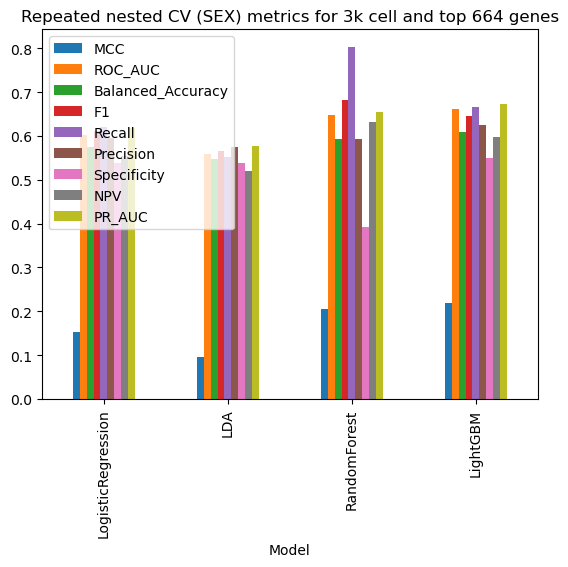

In [39]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_SEX_summary_results_HY.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_SEX_summary_results_HY.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_SEX_summary_results_HY.csv")


winner=get_winner(summary=results_df)

print(f"The winner method for HY only is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

results_df.plot(x='Model',kind='bar',stacked=False,title=f'Repeated nested CV (SEX) metrics for 3k cell and top {len(common_columns)} genes')

[I 2025-06-25 14:07:16,853] A new study created in memory with name: Winner:LightGBM
[I 2025-06-25 14:08:42,180] Trial 0 finished with value: 0.6172196536375385 and parameters: {'n_estimators': 836, 'max_depth': 11, 'learning_rate': 0.005187093043406689, 'verbosity': -1, 'is_unbalance': True}. Best is trial 0 with value: 0.6172196536375385.
[I 2025-06-25 14:10:11,649] Trial 1 finished with value: 0.618558880212025 and parameters: {'n_estimators': 824, 'max_depth': 23, 'learning_rate': 0.006079518789457501, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.618558880212025.
[I 2025-06-25 14:11:01,671] Trial 2 finished with value: 0.6151922370206468 and parameters: {'n_estimators': 425, 'max_depth': 26, 'learning_rate': 0.009201088847992969, 'verbosity': -1, 'is_unbalance': True}. Best is trial 1 with value: 0.618558880212025.
[I 2025-06-25 14:12:13,042] Trial 3 finished with value: 0.6192117023362003 and parameters: {'n_estimators': 758, 'max_depth': 15, 'learning_rat

For model LightGBM the best parameters are {'n_estimators': 758, 'max_depth': 15, 'learning_rate': 0.01544918393620361, 'verbosity': -1, 'is_unbalance': True}
Bootstrapped 95% CIs (Model trained on dev, tested on val):
Balanced Accuracy: [0.4920, 0.5275]
F1 Score       : [0.6572, 0.6900]
Precision      : [0.6513, 0.6915]
Recall         : [0.6552, 0.6963]
MCC            : [-0.0160, 0.0549]
ROC AUC        : [0.4972, 0.5399]
PR AUC         : [0.6507, 0.6976]
Specificity         : 0.3436
NPV                 : 0.3478


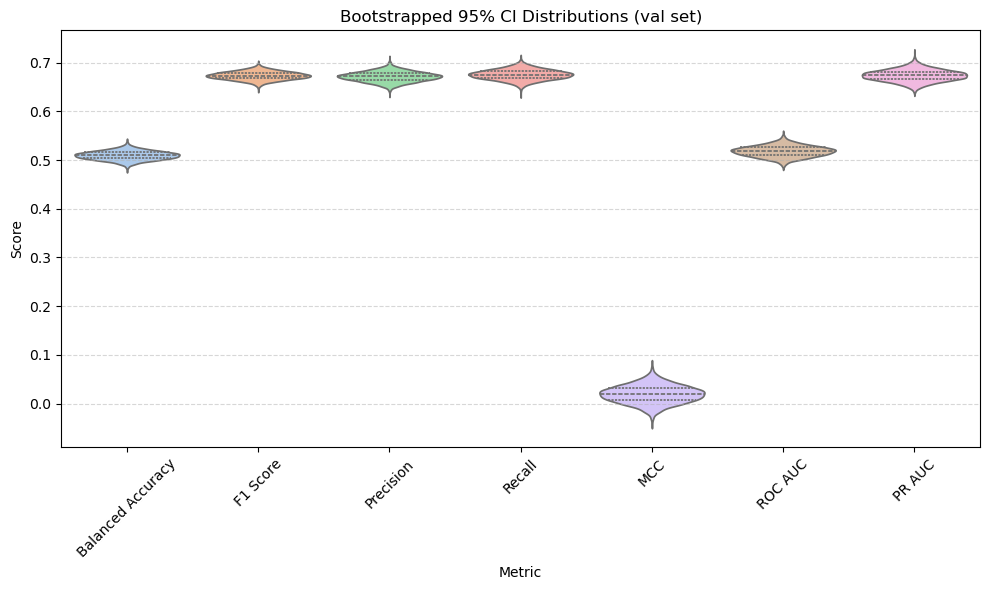

In [42]:
tuned_winner_dev=winner_tuning(df=X_df,winner=winner[0])
bootstrap_model(df_dev=X_df,df_val=test_df,model=tuned_winner_dev)

In [44]:
save_winner(train_path='../data/merged_train_SEX_HY_subset10k.csv',
            test_path='../data/merged_test_SEX_HY_subset3k_v2.csv',
            winner=tuned_winner_dev,
            winner_name=winner[0],
            saved_name='SEX_HY_winner')

(10000, 664)
(3000, 664)
Saving winner model (LightGBM) with name SEX_HY_winner.pkl


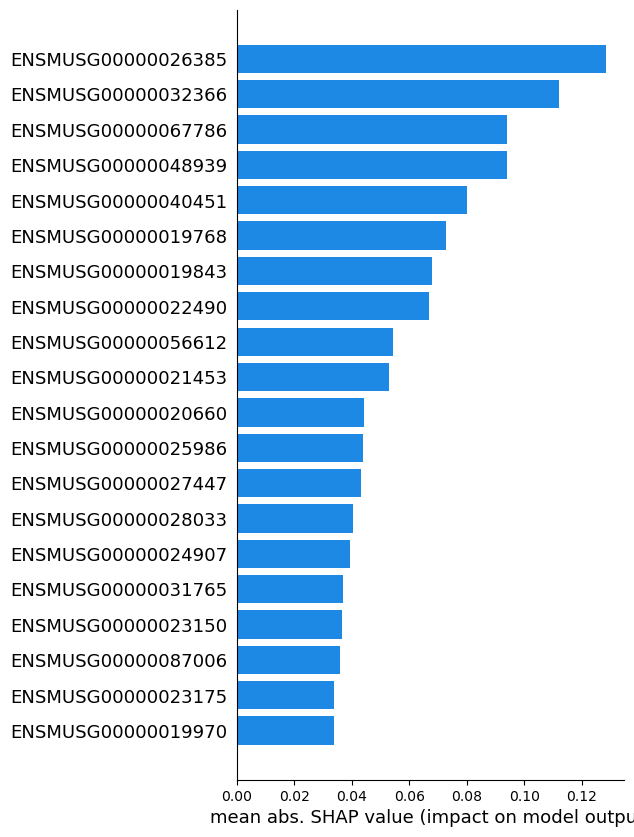

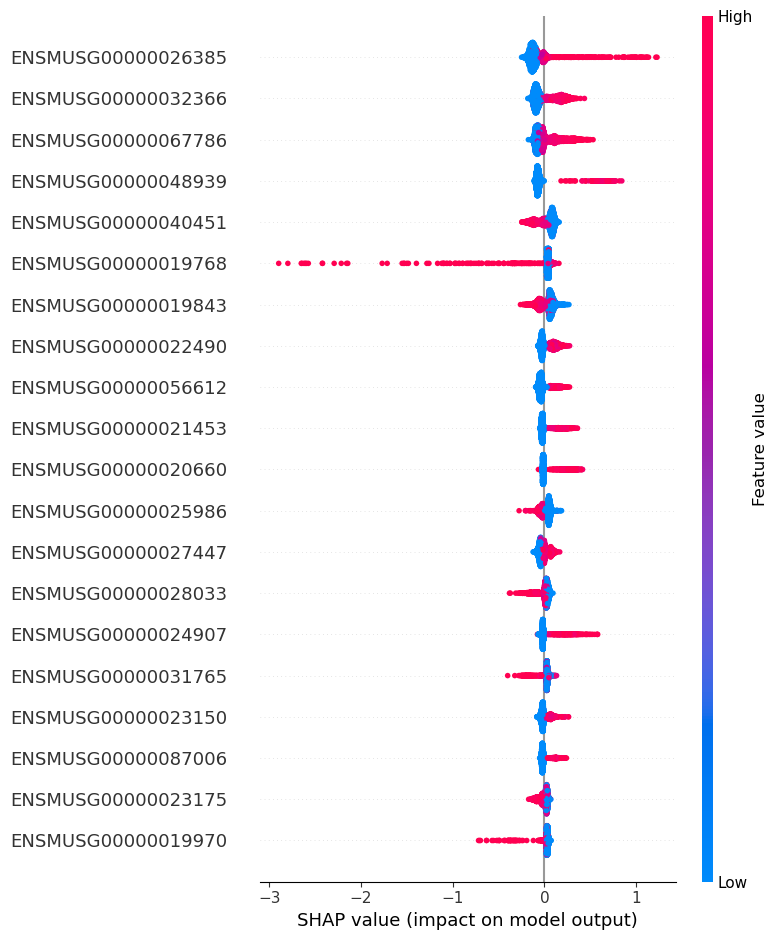

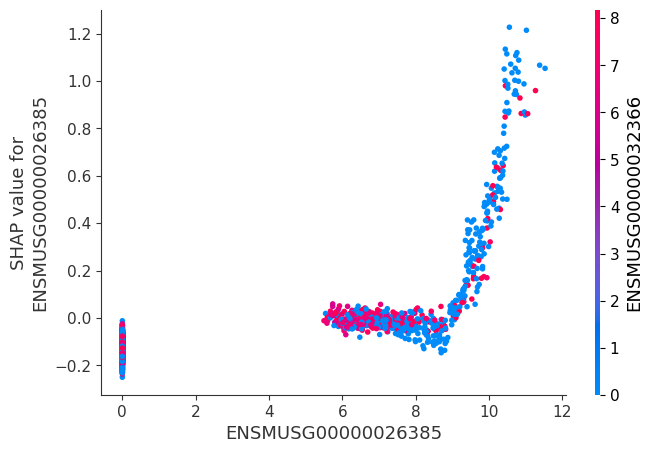

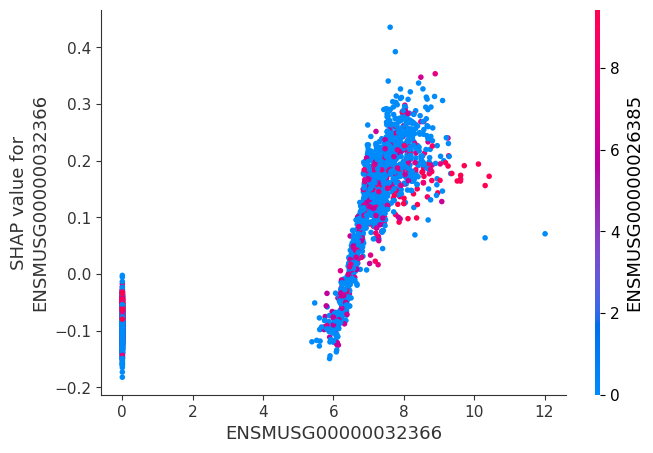

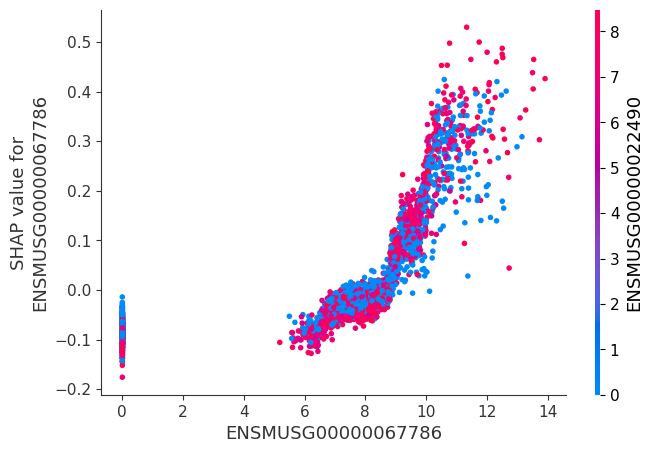

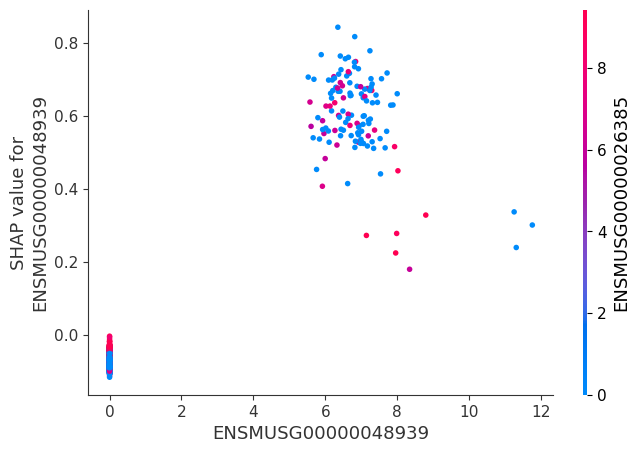

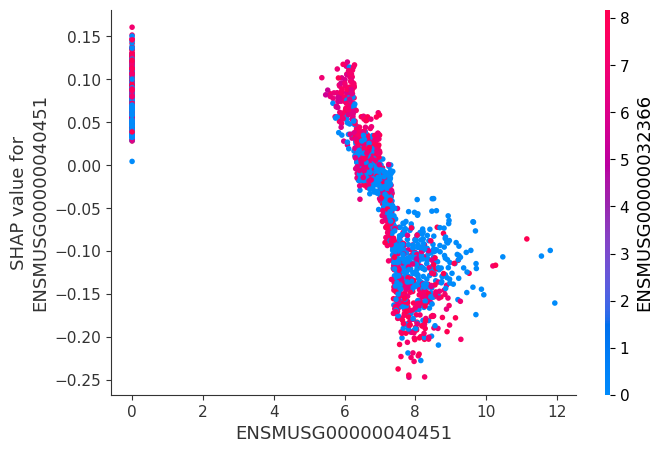

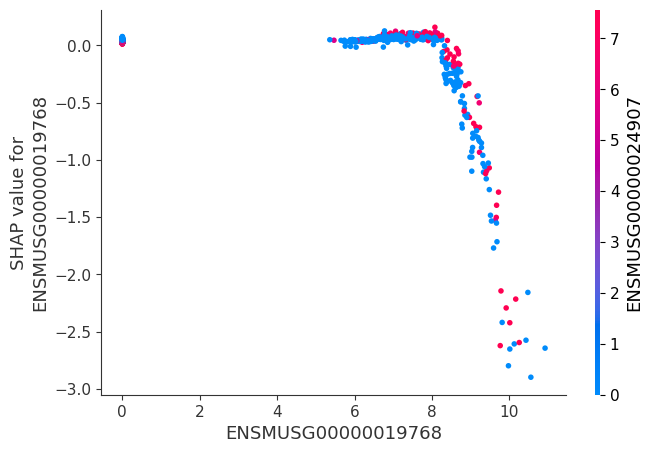

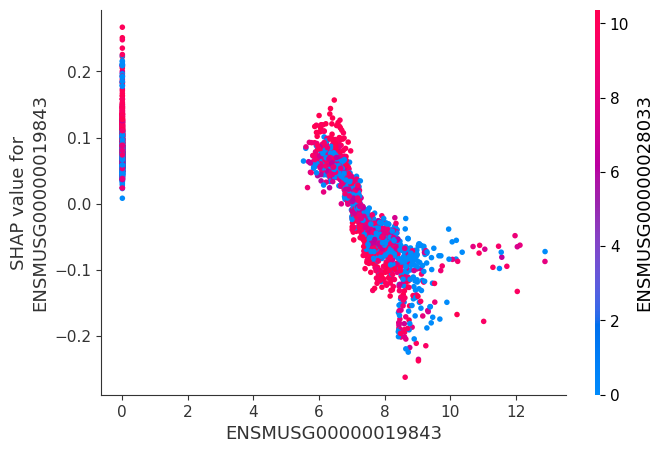

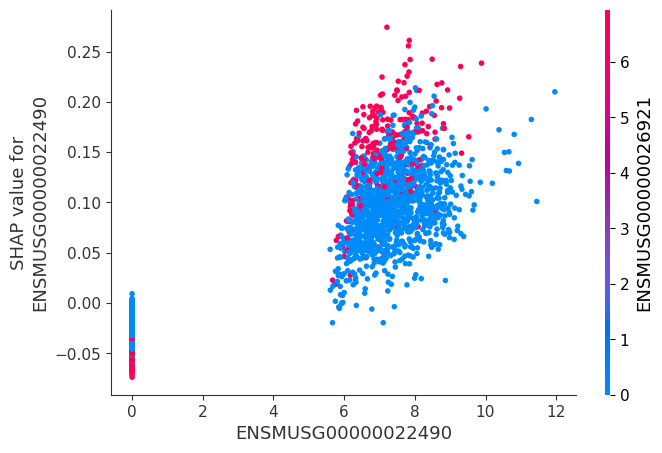

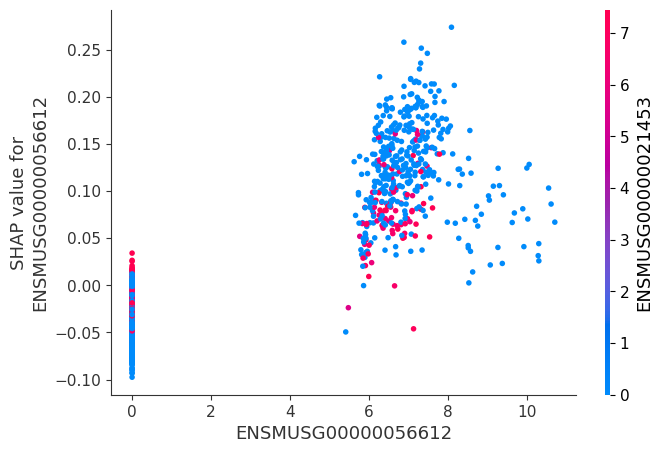

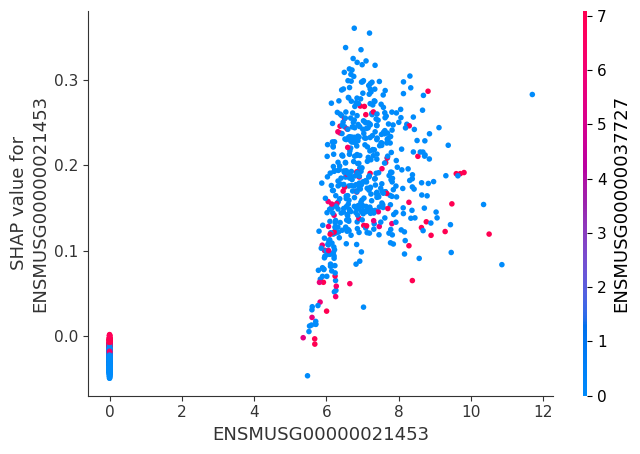

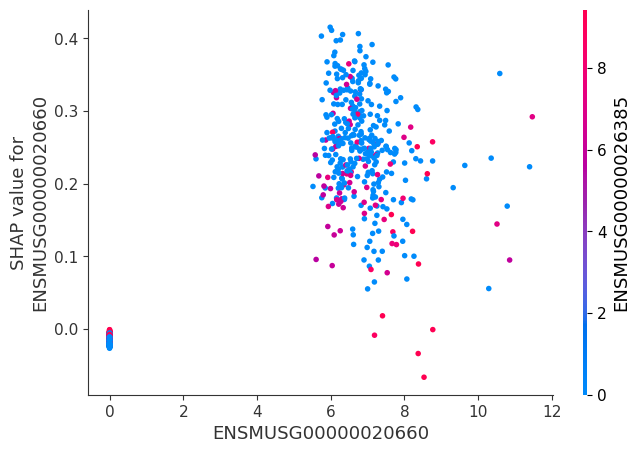

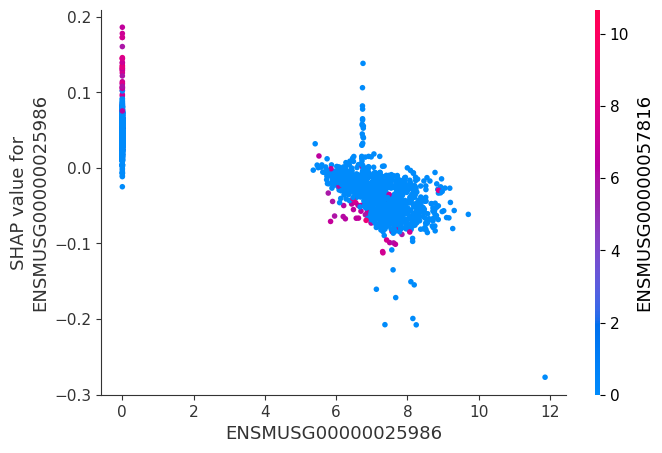

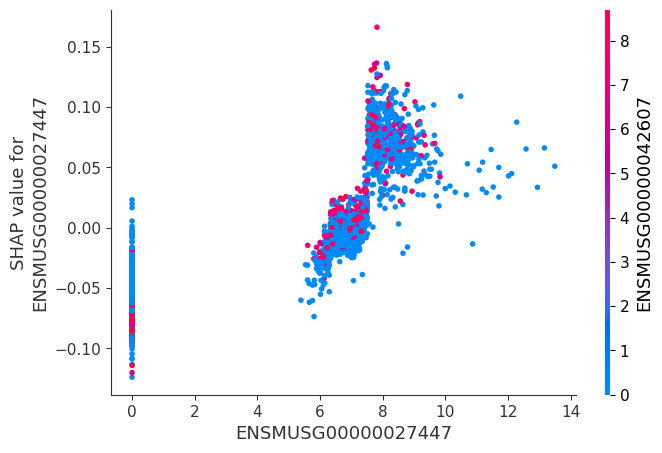

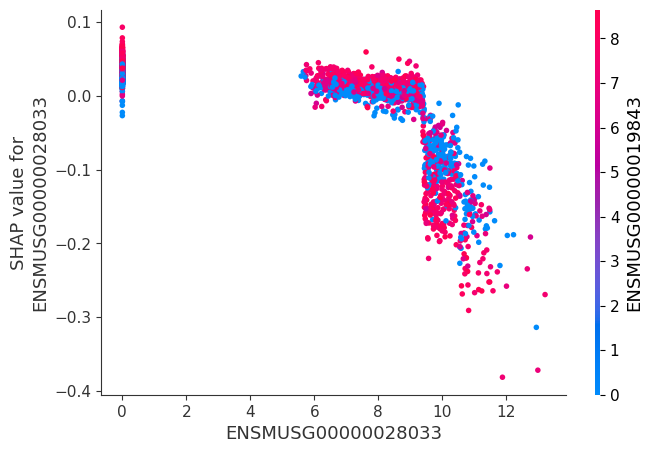

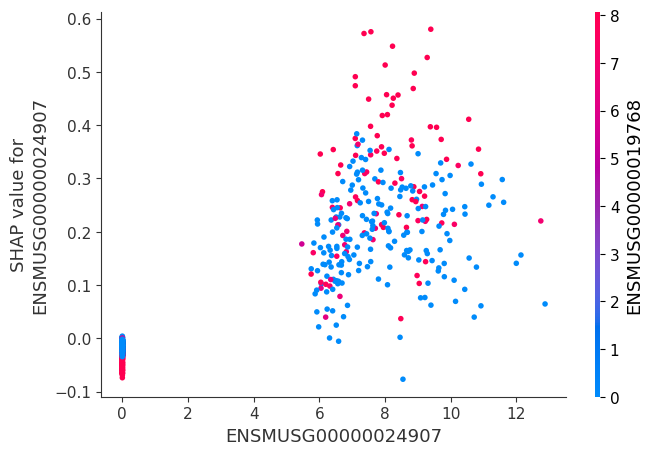

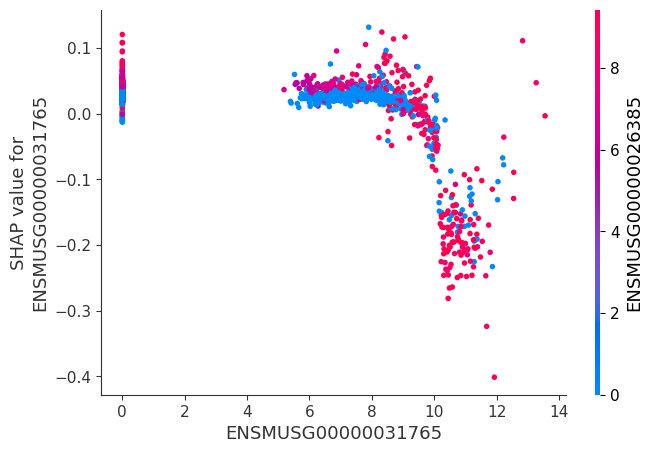

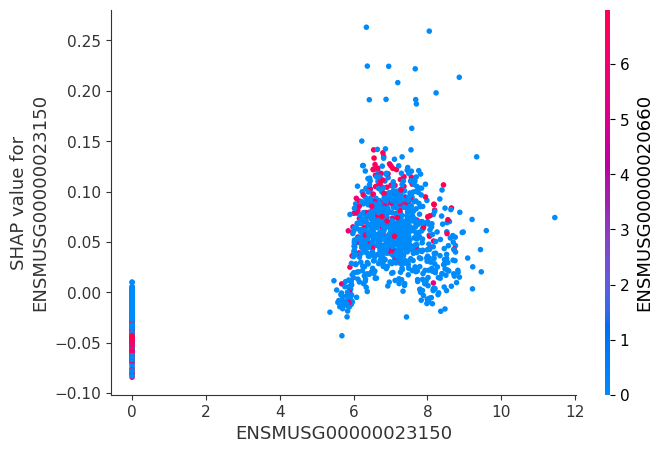

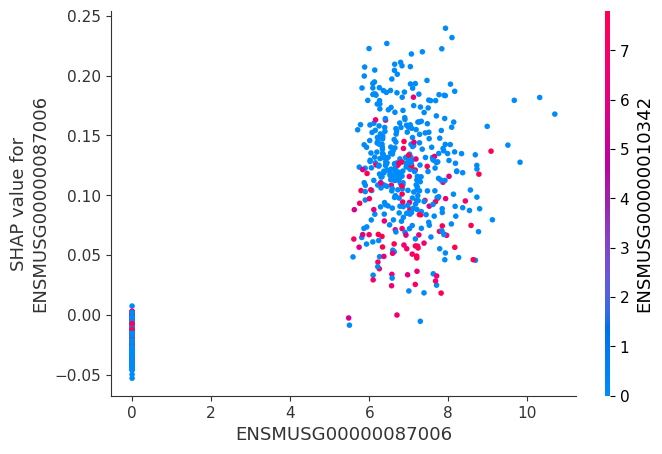

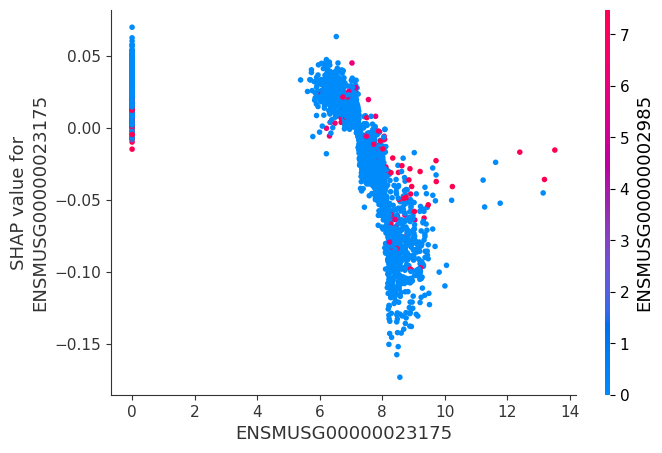

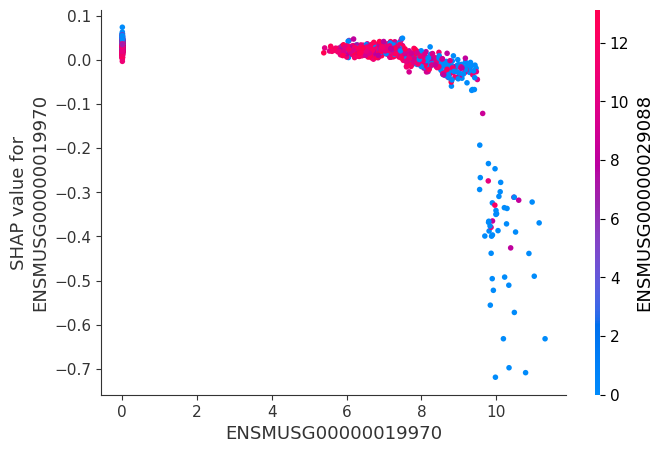

In [45]:
explain_winner(winner_src="../models",
               dev_df=X_df,
               val_df=test_df,
               samples_explained=test_df.shape[0],
               top_k=20,
               saved_name='SEX_HY_winner')